## Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Read Data to Data Frame

In [7]:
df = pd.read_csv('tennis_stats.csv')
#print(df.head())
print(df.info())
print('\n\n')
print(df.describe)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

## Variable Descriptors (Provided by Code Academy)

### Identifying Data
- Player: name of the tennis player
- Year: year data was recorded

### Service Game Columns (Offensive)
- Aces: number of serves by the player where the receiver does not touch the ball
- DoubleFaults: number of times player missed both first and second serve attempts
- FirstServe: % of first-serve attempts made
- FirstServePointsWon: % of first-serve attempt points won by the player
- SecondServePointsWon: % of second-serve attempt points won by the player
- BreakPointsFaced: number of times where the receiver could have won service game of the player
- BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they had the chance
- ServiceGamesPlayed: total number of games where the player served
- ServiceGamesWon: total number of games where the player served and won
- TotalServicePointsWon: % of points in games where the player served that they won

### Return Game Columns (Defensive)
- FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win
- SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win
- BreakPointsOpportunities: number of times where the player could have won the service game of the opponent
- BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance
- ReturnGamesPlayed: total number of games where the player’s opponent served
- ReturnGamesWon: total number of games where the player’s opponent served and the player won
- ReturnPointsWon: total number of points where the player’s opponent served and the player won
- TotalPointsWon: % of points won by the player

### Outcomes
- Wins: number of matches won in a year
- Losses: number of matches lost in a year
- Winnings: total winnings in USD($) in a year
- Ranking: ranking at the end of year

## Check for Data Cleanliness

In [ ]:
"""
Player                      1721 non-null   object --> !!!!Object is fine, nominal data, but check unique to make sure we don't have gaps due to unknowns
Year                        1721 non-null   int64  --> int64 is fine
FirstServe                  1721 non-null   float64--> !!!! float64 is fine, but need to check unique()
FirstServePointsWon         1721 non-null   float64--> float64 is fine
FirstServeReturnPointsWon   1721 non-null   float64--> float64 is fine
SecondServePointsWon        1721 non-null   float64--> float64 is fine
SecondServeReturnPointsWon  1721 non-null   float64--> float64 is fine
Aces                        1721 non-null   int64  --> int64 is fine
BreakPointsConverted        1721 non-null   float64--> float64 is fine
BreakPointsFaced            1721 non-null   int64  --> int64 is fine
BreakPointsOpportunities    1721 non-null   int64  --> int64 is fine
BreakPointsSaved            1721 non-null   float64--> float64 is fine
DoubleFaults                1721 non-null   int64  --> int64 is fine
ReturnGamesPlayed           1721 non-null   int64  --> int64 is fine
ReturnGamesWon              1721 non-null   float64--> float64 is fine
ReturnPointsWon             1721 non-null   float64--> float64 is fine
ServiceGamesPlayed          1721 non-null   int64  --> int64 is fine
ServiceGamesWon             1721 non-null   float64--> float64 is fine
TotalPointsWon              1721 non-null   float64--> float64 is fine
TotalServicePointsWon       1721 non-null   float64--> float64 is fine
Wins                        1721 non-null   int64  --> int64 is fine
Losses                      1721 non-null   int64  --> int64 is fine
Winnings                    1721 non-null   int64  --> int64 is fine
Ranking                     1721 non-null   int64  --> int64 is fine

"""

## Data Cleaning / Inspection

In [10]:
print(df.Player.unique())
#No apparent blanks / unknowns when checking this data

print('\n\n')
print(df.FirstServe.unique())
#Not familiar enough with Tennis to confirm what first serve signifies, but float64 appears to be the correct data type for this set

['Pedro Sousa' 'Roman Safiullin' 'Rogerio Dutra Silva'
 'Daniel Gimeno-Traver' 'Andres Artunedo Martinavarro' 'Eduardo Struvay'
 'Riccardo Bellotti' 'Austin Krajicek' 'Guilherme Clezar' 'Blaz Kavcic'
 'Ze Zhang' 'John Millman' 'Jurgen Melzer' 'Kristijan Mesaros'
 'Fabiano De Paula' 'Salvatore Caruso' 'Philipp Davydenko'
 'Kenny De Schepper' 'Simone Bolelli' 'Alexander Ward' 'Darian King'
 'Carlos Berlocq' 'Marco Cecchinato' 'Gonzalo Escobar' 'Omar Jasika'
 'Rubin Statham' 'Roberto Bautista Agut' 'Flavio Cipolla' 'Louis Wessels'
 'Diego Schwartzman' 'Gerard Granollers' 'Frederik Nielsen'
 'Riccardo Ghedin' 'Aldin Setkic' 'Matteo Viola' 'Joao Domingues'
 'Gregoire Barrere' 'Mate Pavic' 'Laurent Lokoli' 'Kevin Anderson'
 'John Isner' 'Christopher Eubanks' 'Maximo Gonzalez' 'Gerald Melzer'
 'Santiago Giraldo' 'Daniel Brands' 'Walter Trusendi' 'Axel Michon'
 'Fernando Verdasco' 'Andrea Arnaboldi' 'Konstantin Kravchuk'
 'Bradley Klahn' 'Dusan Lajovic' 'Dimitar Kuzmanov'
 'Frederico Ferreira 

## Perform EDA (Exploratory Data Analysis)

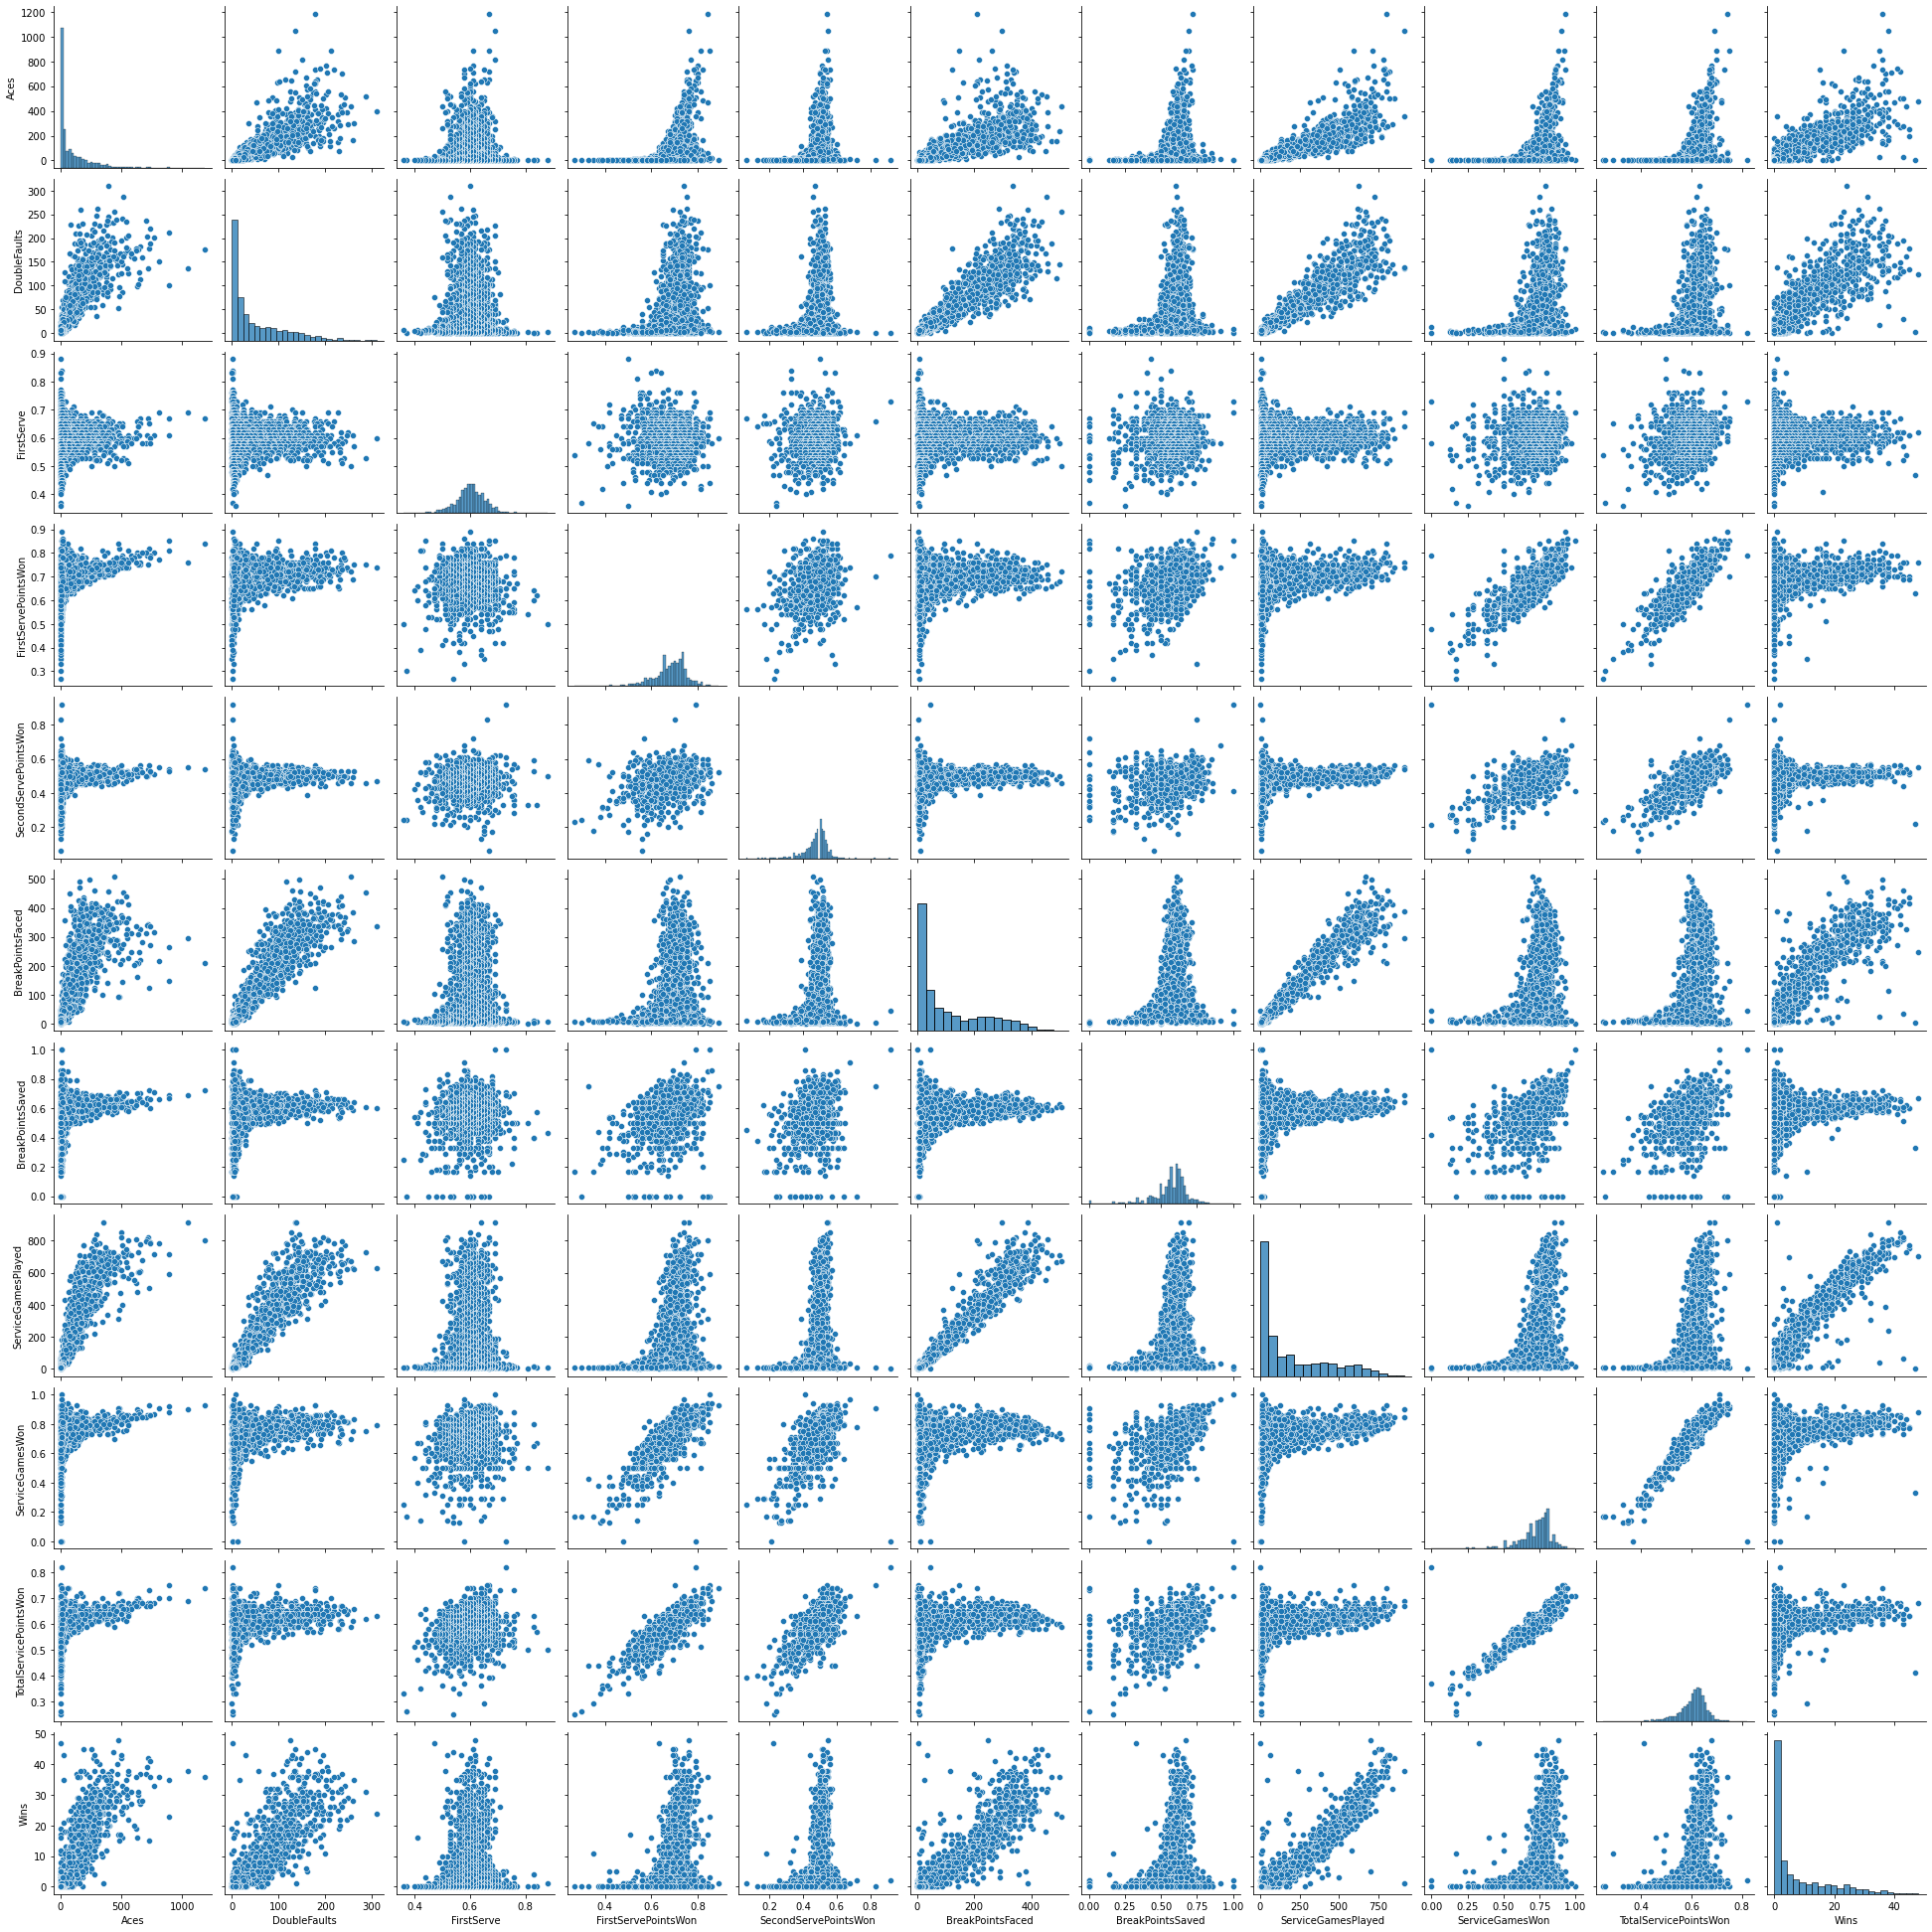

<Figure size 432x288 with 0 Axes>

In [12]:
# So excited to try out pairplot on a full project on here
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

#To keep the system burden down per chart, first we will break the df into 'offensive v Wins' and 'defensive v Losses' groups

df_off_win = df[['Aces', 'DoubleFaults', 'FirstServe', 'FirstServePointsWon',\
                  'SecondServePointsWon', 'BreakPointsFaced', 'BreakPointsSaved',\
                 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalServicePointsWon','Wins']]

sns.pairplot(data=df_off_win, diag_kind="hist")
plt.show()
plt.clf()

"""Postive Correlations Found v Wins:
- Aces
- DoubleFaults
- BreakPointsFaced
- ServiceGamesPlayed
"""

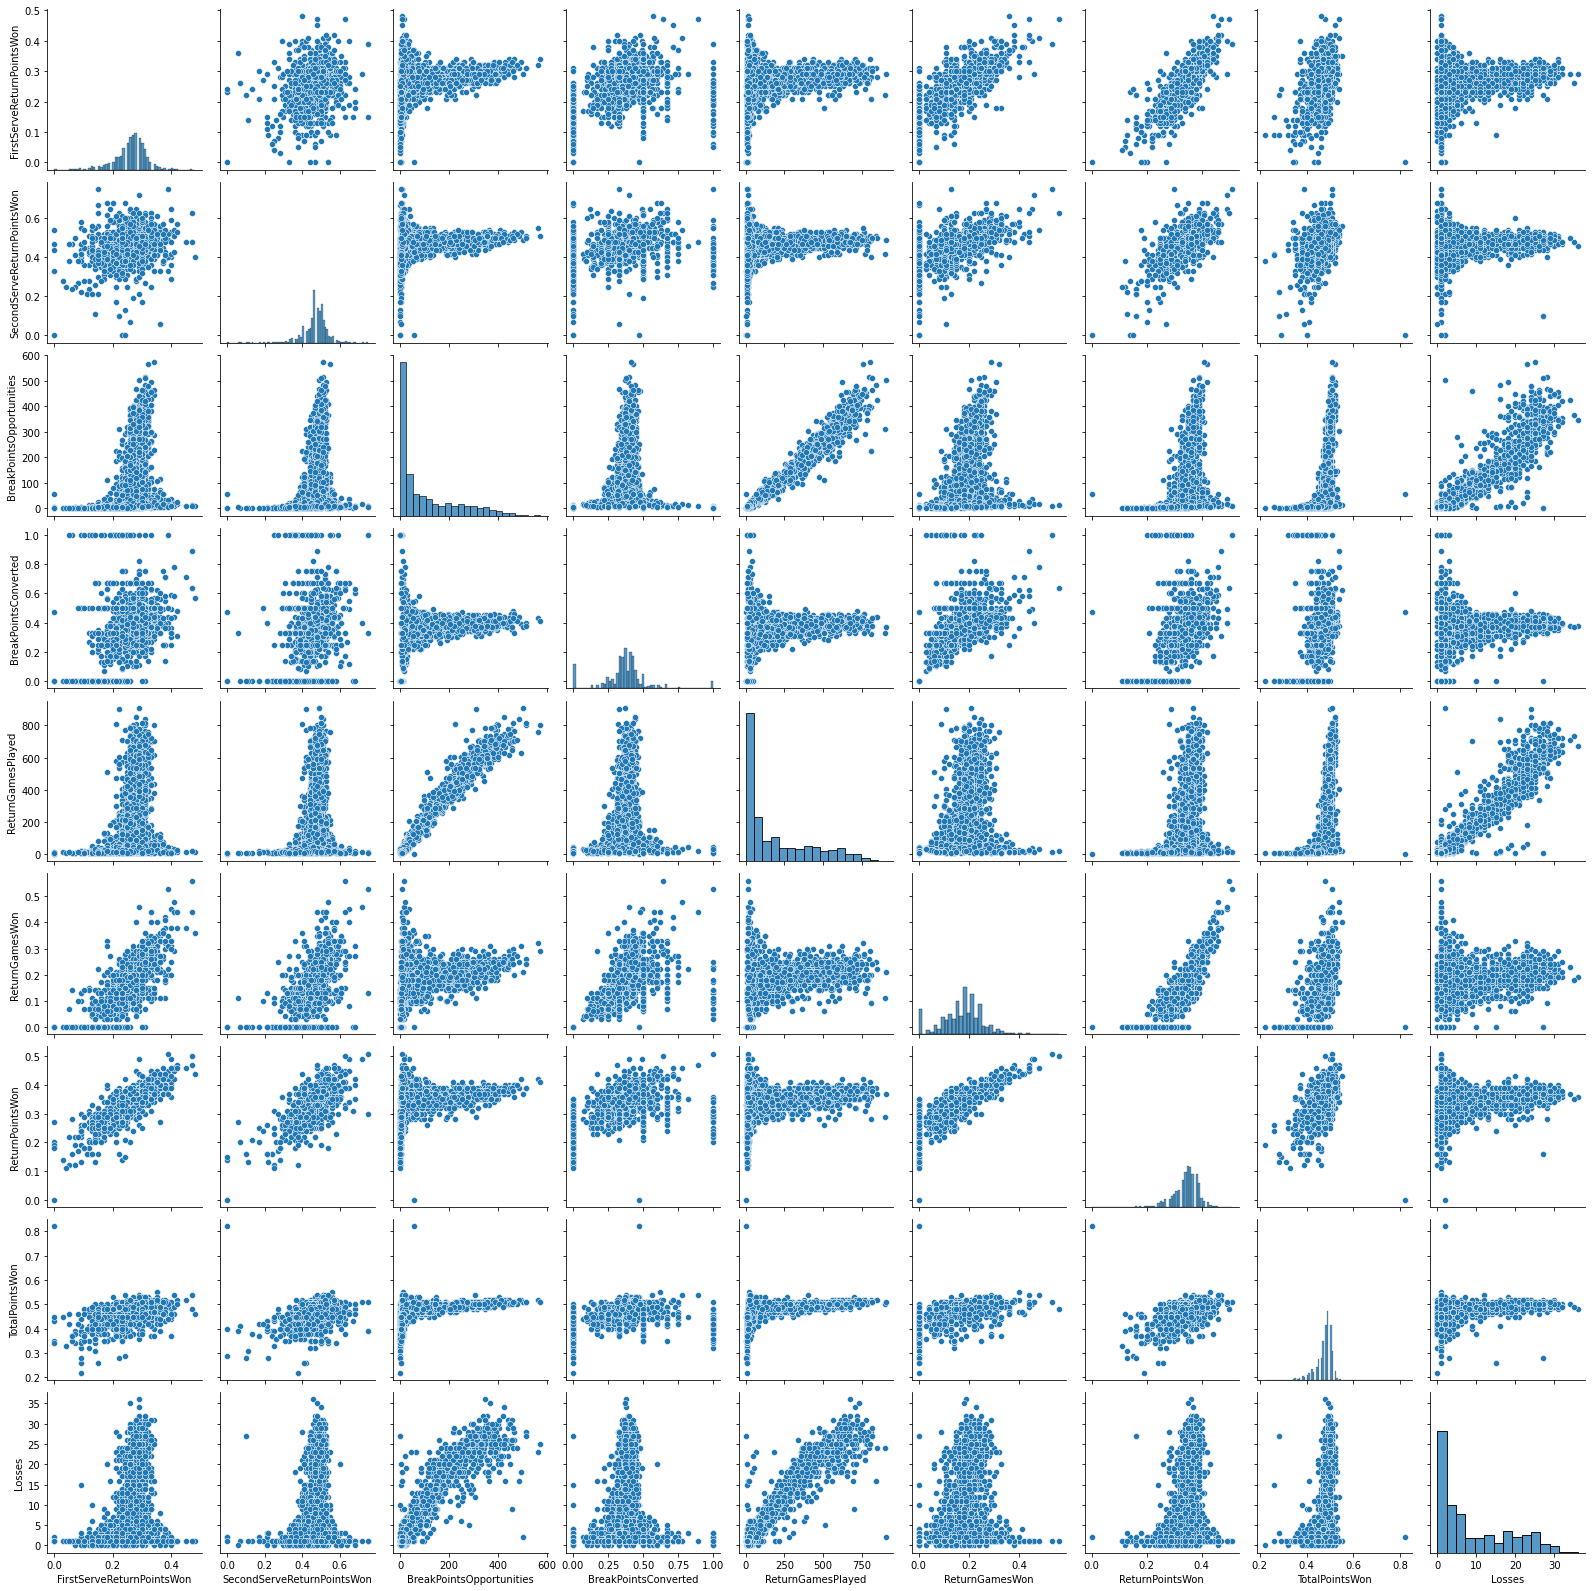

'Postive Correlations Found v Losses:\n- \n\n'

<Figure size 432x288 with 0 Axes>

In [14]:
df_def_loss = df[['FirstServeReturnPointsWon', 'SecondServeReturnPointsWon', 'BreakPointsOpportunities',\
                  'BreakPointsConverted', 'ReturnGamesPlayed', 'ReturnGamesWon', 'ReturnPointsWon', 'TotalPointsWon','Losses']]

sns.pairplot(data=df_def_loss, diag_kind="hist")
plt.show()
plt.clf()

"""Postive Correlations Found v Losses:
- BreakPointsOpportunities
- ReturnGamesPlayed
"""

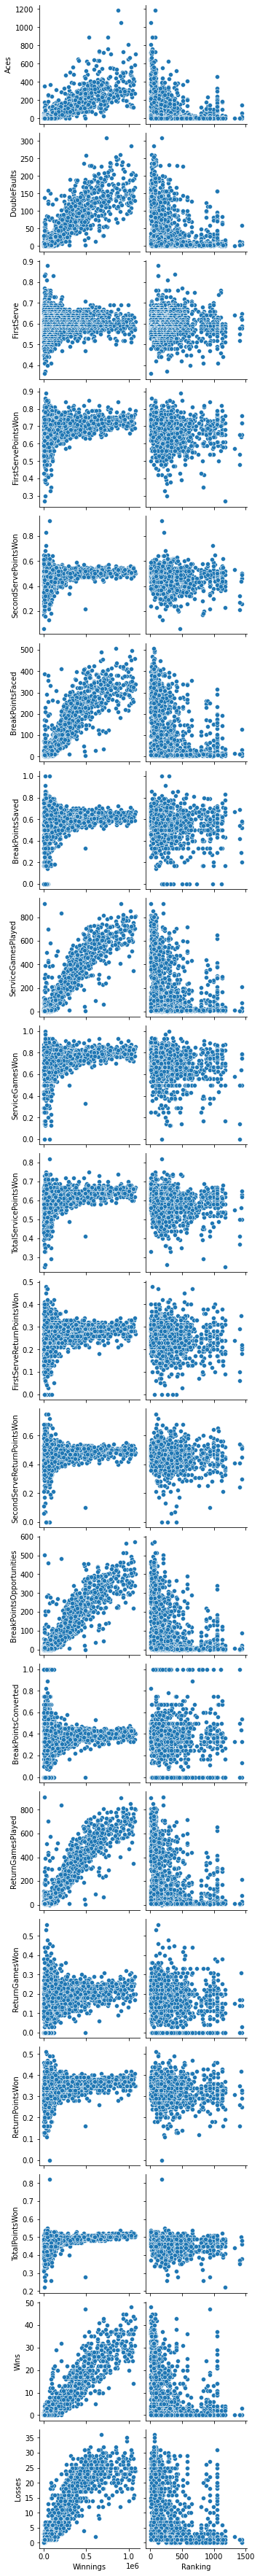

'Postive Correlations Found v Wins:\n- Aces\n- DoubleFaults\n- BreakPointsFaced\n- ServiceGamesPlayed\n'

<Figure size 432x288 with 0 Axes>

In [15]:
#Now we will check offense and defense attributes against Winnings and Ranking

sns.pairplot(data=df, x_vars=['Winnings', 'Ranking'], y_vars=['Aces', 'DoubleFaults', 'FirstServe', 'FirstServePointsWon',\
                  'SecondServePointsWon', 'BreakPointsFaced', 'BreakPointsSaved',\
                 'ServiceGamesPlayed', 'ServiceGamesWon', 'TotalServicePointsWon',\
                'FirstServeReturnPointsWon', 'SecondServeReturnPointsWon', 'BreakPointsOpportunities',\
                  'BreakPointsConverted', 'ReturnGamesPlayed', 'ReturnGamesWon', 'ReturnPointsWon',\
                    'TotalPointsWon', 'Wins','Losses'])
plt.show()
plt.clf()

"""
Postive Correlations Found v Winnings:
- Wins and Losses ??? Not sure I'm reading this right
- (Minor) Aces
- DoubleFaults
- BreakPointsFaced
- ServiceGamesPlayed
- BreakPointsOpportunities
- ReturnGamesPlayed

Minor Negative Correlations Found v Ranking:
- Aces
- DoubleFaults
- BreakPointsFaced
- ServiceGamesPlayed
- Wins and Losses, but with heavy outliers
"""


## Perform Single Feature Linear Regressions

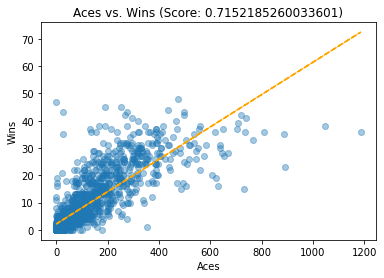

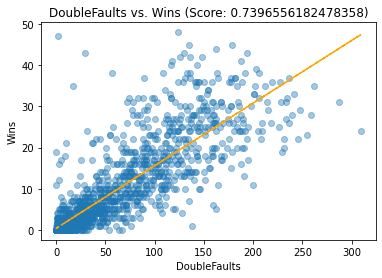

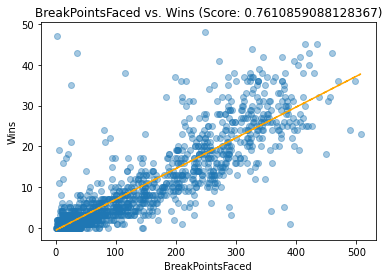

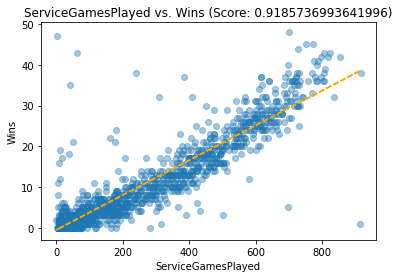

<Figure size 432x288 with 0 Axes>

In [30]:
#Win Linear Regressions First

#Aces vs Wins
features = df[['Aces']]
outcomes = df[['Wins']]

x_train, x_test, y_train, y_test = train_test_split(features, outcomes, train_size=.8, test_size=.2)

model = LinearRegression()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)

predictions = model.predict(features)

plt.scatter(features, outcomes, alpha=.4)
plt.plot(features, predictions, ls='--', color='orange')
plt.xlabel('Aces')
plt.ylabel('Wins')
plt.title('Aces vs. Wins (Score: ' + str(score) + ')')
plt.show()
plt.clf()


#DoubleFaults vs Wins
features = df[['DoubleFaults']]
outcomes = df[['Wins']]

x_train, x_test, y_train, y_test = train_test_split(features, outcomes, train_size=.8, test_size=.2)

model = LinearRegression()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)

predictions = model.predict(features)

plt.scatter(features, outcomes, alpha=.4)
plt.plot(features, predictions, ls='--', color='orange')
plt.xlabel('DoubleFaults')
plt.ylabel('Wins')
plt.title('DoubleFaults vs. Wins (Score: ' + str(score) + ')')
plt.show()
plt.clf()

#BreakPointsFaced vs Wins
features = df[['BreakPointsFaced']]
outcomes = df[['Wins']]

x_train, x_test, y_train, y_test = train_test_split(features, outcomes, train_size=.8, test_size=.2)

model = LinearRegression()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)

predictions = model.predict(features)

plt.scatter(features, outcomes, alpha=.4)
plt.plot(features, predictions, ls='--', color='orange')
plt.xlabel('BreakPointsFaced')
plt.ylabel('Wins')
plt.title('BreakPointsFaced vs. Wins (Score: ' + str(score) + ')')
plt.show()
plt.clf()

#ServiceGamesPlayed vs Wins
features = df[['ServiceGamesPlayed']]
outcomes = df[['Wins']]

x_train, x_test, y_train, y_test = train_test_split(features, outcomes, train_size=.8, test_size=.2)

model = LinearRegression()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)

predictions = model.predict(features)

plt.scatter(features, outcomes, alpha=.4)
plt.plot(features, predictions, ls='--', color='orange')
plt.xlabel('ServiceGamesPlayed')
plt.ylabel('Wins')
plt.title('ServiceGamesPlayed vs. Wins (Score: ' + str(score) + ')')
plt.show()
plt.clf()

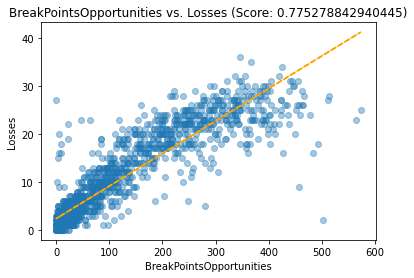

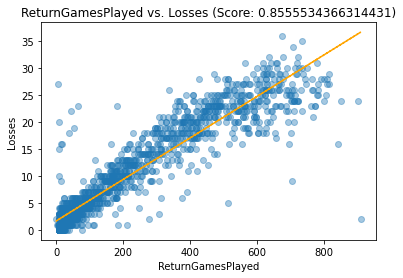

<Figure size 432x288 with 0 Axes>

In [32]:
#Loss Linear Regressions Second

#BreakPointsOpportunities vs Losses
features = df[['BreakPointsOpportunities']]
outcomes = df[['Losses']]

x_train, x_test, y_train, y_test = train_test_split(features, outcomes, train_size=.8, test_size=.2)

model = LinearRegression()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)

predictions = model.predict(features)

plt.scatter(features, outcomes, alpha=.4)
plt.plot(features, predictions, ls='--', color='orange')
plt.xlabel('BreakPointsOpportunities')
plt.ylabel('Losses')
plt.title('BreakPointsOpportunities vs. Losses (Score: ' + str(score) + ')')
plt.show()
plt.clf()

#ReturnGamesPlayed vs Losses
features = df[['ReturnGamesPlayed']]
outcomes = df[['Losses']]

x_train, x_test, y_train, y_test = train_test_split(features, outcomes, train_size=.8, test_size=.2)

model = LinearRegression()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)

predictions = model.predict(features)

plt.scatter(features, outcomes, alpha=.4)
plt.plot(features, predictions, ls='--', color='orange')
plt.xlabel('ReturnGamesPlayed')
plt.ylabel('Losses')
plt.title('ReturnGamesPlayed vs. Losses (Score: ' + str(score) + ')')
plt.show()
plt.clf()

## Perform Two Feature Linear Regressions

In [41]:
#DoubleFaults & BreakPointsFaced v Winnings
features = df[['DoubleFaults', 'BreakPointsFaced']]
outcomes = df[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(features, outcomes, train_size=.8, test_size=.2)

model = LinearRegression()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print('Scores')
print('DoubleFaults & BreakPointsFaced: {}'.format(score))

#BreakPointsFaced & ServiceGamesPlayed v Winnings
features = df[['BreakPointsFaced', 'ServiceGamesPlayed']]
outcomes = df[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(features, outcomes, train_size=.8, test_size=.2)

model = LinearRegression()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print('BreakPointsFaced & ServiceGamesPlayed: {}'.format(score))

#ServiceGamesPlayed & BreakPointsOpportunities v Winnings
features = df[['ServiceGamesPlayed', 'BreakPointsOpportunities']]
outcomes = df[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(features, outcomes, train_size=.8, test_size=.2)

model = LinearRegression()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print('ServiceGamesPlayed & BreakPointsOpportunities: {}'.format(score))

#BreakPointsOpportunities & ReturnGamesPlayed v Winnings
features = df[['BreakPointsOpportunities', 'ReturnGamesPlayed']]
outcomes = df[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(features, outcomes, train_size=.8, test_size=.2)

model = LinearRegression()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print('BreakPointsOpportunities & ReturnGamesPlayed: {}'.format(score))

"""
(ServiceGamesPlayed & BreakPointsOpportunities)
and
(BreakPointsOpportunities & ReturnGamesPlayed)

...Seem to show the strongest relationship toward accurate modeling (R^2) during repeat runs of the model
"""

Scores
DoubleFaults & BreakPointsFaced: 0.7885528141690712
BreakPointsFaced & ServiceGamesPlayed: 0.8567337073518306
ServiceGamesPlayed & BreakPointsOpportunities: 0.8490642759917163
BreakPointsOpportunities & ReturnGamesPlayed: 0.8451526120806646


'\nServiceGamesPlayed & BreakPointsOpportunities seem to show the strongest relationship toward accurate modeling\n'

## Perform Multi Feature Linear Regressions

In [48]:
#Last: We run 1 Linear Regression with all the variables targeting toward the winnings
features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
outcome = df[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(features, outcomes, train_size=.8, test_size=.2)

model = LinearRegression()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print('Multi Feature Score: {}'.format(score))

#And if we remove a few of the features we no show no strong correlation against winnings
#Such as: 

features = df[['FirstServe','FirstServePointsWon',
'SecondServePointsWon','Aces','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ServiceGamesPlayed']]
outcome = df[['Winnings']]

x_train, x_test, y_train, y_test = train_test_split(features, outcomes, train_size=.8, test_size=.2)

model = LinearRegression()
model.fit(x_train, y_train)
score = model.score(x_test, y_test)
print('Multi Feature Optimized Score: {}'.format(score))

Multi Feature Score: 0.8179549216035558
Multi Feature Optimized Score: 0.8610701790263873
